In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise

For these exercices we are using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernels) provided by Airbnb for a Kaggle competition. It describes its offer for New York City in 2019, including types of appartments, price, location etc.

## 1. Create a dataframe 
Create a dataframe of a few lines with objects and their poperties (e.g fruits, their weight and colour).
Calculate the mean of your Dataframe.

In [2]:
dict_of_list = {'fruit_name': ["apple", "pear", "watermelon"], 'weight':[100, 94, 95], 'colour':['green', "yellow", "rosa"]}
fruits = pd.DataFrame(dict_of_list)

In [3]:
fruits.describe()
# calculates common statistical values
# and makes it only for the columns that make sense

,weight
count,3.000000
mean,96.333333
std,3.214550
min,94.000000
25%,94.500000
50%,95.000000
75%,97.500000
max,100.000000


In [4]:
fruits.mean()

weight    96.333333
dtype: float64

## 2. Import
- Import the table called ```AB_NYC_2019.csv``` as a dataframe. It is located in the Datasets folder. Have a look at the beginning of the table (head).

- Create a histogram of prices

In [5]:
mydata = pd.read_csv('Datasets/AB_NYC_2019.csv')
# mydata

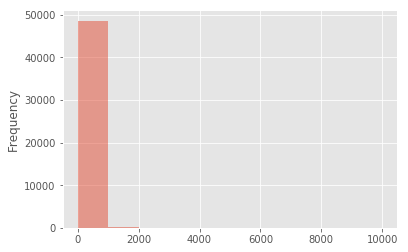

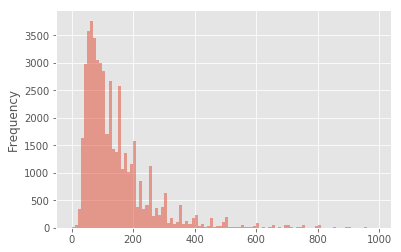

In [6]:
plt.style.use('ggplot')
mydata['price'].plot.hist(alpha = 0.5)
plt.show()
# to have nicer plot (more bars)
mydata['price'].plot.hist(alpha = 0.5, bins=range(0,1000,10))
plt.show()

## 3. Operations

Create a new column in the dataframe by multiplying the "price" and "availability_365" columns to get an estimate of the maximum yearly income.

In [7]:
mydata['max_yearly_income'] = mydata['price'] * mydata['availability_365']

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [8]:
# what can be done with numpy can be done
# np.log(mydata['price'])

In [9]:
# mydata

## 3b. Subselection and plotting
Create a new Dataframe by first subselecting yearly incomes between 1 and 100'000. Then make a scatter plot of yearly income versus number of reviews 

In [10]:
#mydata_sub = mydata[ (mydata['max_yearly_income'] >= 1) and (mydata['max_yearly_income'] <= 100000) ]
#mydata_sub = mydata[ (mydata.max_yearly_income >= 1) and (mydata.max_yearly_income <= 100000) ]
mydata_sub = mydata[ (mydata['max_yearly_income'] >= 1) & (mydata['max_yearly_income'] <= 100000) ].copy()
# mydata[(mydata.max_yearly_income>=1)&(mydata.max_yearly_income <= 100000)].copy()
# mydata_sub

99900

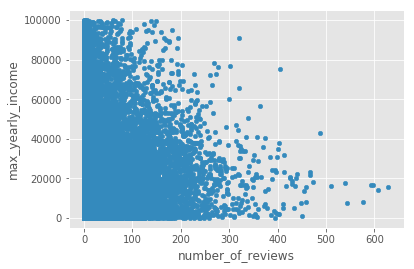

In [11]:
mydata_sub.plot(x = 'number_of_reviews', y = 'max_yearly_income',kind = 'scatter')
max(mydata_sub['max_yearly_income'])

## 4. Combine

We provide below an additional table that contains the number of inhabitants of each of New York's boroughs ("neighbourhood_group" in the table). Use ```merge``` to add this population information to each element in the original dataframe.

In [12]:
borough_dt = pd.read_excel('Datasets/ny_boroughs.xlsx')
#borough_dt


In [13]:
#mydata

In [14]:
merged_dt = pd.merge(mydata, borough_dt, left_on='neighbourhood_group', right_on='borough', how='left')
#merged_dt

## 5. Groups

- Using ```groupby``` calculate the average price for each type of room (room_type) in each neighbourhood_group. What is the average price for an entire home in Brooklyn ?
- Unstack the multi-level Dataframe into a regular Dataframe with ```unstack()``` and create a bar plot with the resulting table


In [15]:
merged_dt.groupby(['neighbourhood_group','room_type']).price.mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

In [16]:
merged_dt.groupby(['neighbourhood_group','room_type']).price.mean()['Brooklyn']['Entire home/apt']

178.32754472225128

In [17]:
merged_dt.groupby(['neighbourhood_group','room_type'])['price'].mean()['Brooklyn']['Entire home/apt']

178.32754472225128

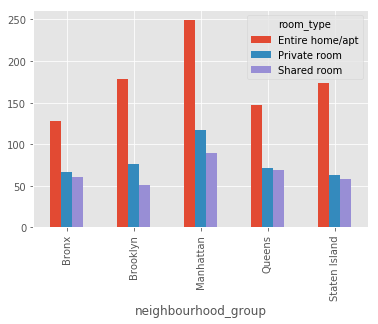

In [18]:
unstd_dt = merged_dt.groupby(['neighbourhood_group','room_type']).price.mean().unstack()
unstd_dt.plot(kind = 'bar');

## 6. Advanced plotting

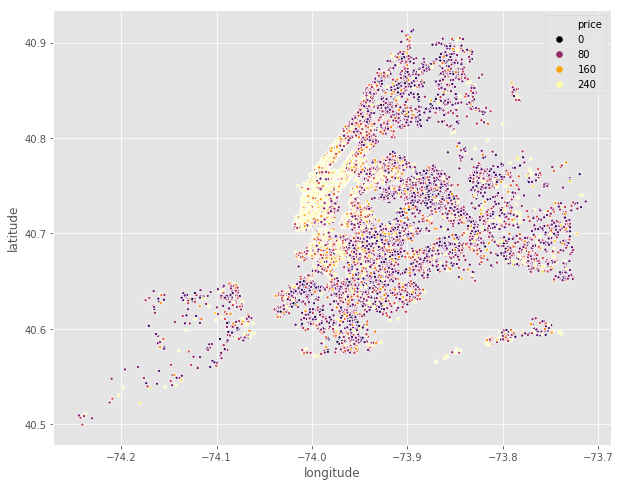

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
g = sns.scatterplot(data = merged_dt, y = 'latitude', x = 'longitude', hue = 'price',
                    hue_norm=(0,200), s=10, palette='inferno')

Using Seaborn, create a scatter plot where x and y positions are longitude and lattitude, the color reflects price and the shape of the marker the borough (neighbourhood_group). Can you recognize parts of new york ? Does the map make sense ?